# Phishing URL analysis and a phishing URL detector implementation using machine learning method


1. Data prepocessing.

In the first step, we import all the necessary libraries and dataset, which includes two columns. 
The first column stores the URL links and the second one includes labels "good" or "bad".
Label "bad" means the URL is phishing. Label "good" represents for legitimate website URL.

In [131]:
# import libraries
import pandas as pd
import numpy as np
import plotly.express as px

# import train dataset
data = pd.read_csv("train_url_new.csv") 

# Output the imported data 
data

,URL,Label
0,facebook.com/martin.paul,good
1,mikworks.com/originalwork/footballers/,good
2,upi.com/Top_News/US/2010/12/19/Transbay-Tube-d...,good
3,evri.com/person/thomas-dagworth-0x9f71d,good
4,eastbay.citysearch.com/profile/1033557/berkele...,good
...,...,...
39995,infoplease.com/ce6/people/A0828989.html,good
39996,healthgrades.com/dentist/dr-william-dismuke-2j...,good
39997,nfl.com/players/search?filter=linebacker&confe...,good
39998,annakraktour.pl/World/gucci2014/gdocs/document...,bad


2. Split the URL links

To analyse the links we have to split them. As we can notice, URL links in the dataset do not include protocol. 
That is why we are going to split the URL links into domain and path. 

In [132]:
# Split the link into domain and path
analysis_data = data['URL'].str.split("/",1,expand = True)

# Rename columns of the splited data 
analysis_data.columns=["domain","path"] 

# Output the splited data 
analysis_data

,domain,path
0,facebook.com,martin.paul
1,mikworks.com,originalwork/footballers/
2,upi.com,Top_News/US/2010/12/19/Transbay-Tube-down-to-o...
3,evri.com,person/thomas-dagworth-0x9f71d
4,eastbay.citysearch.com,profile/1033557/berkeley_ca/skates_on_the_bay....
...,...,...
39995,infoplease.com,ce6/people/A0828989.html
39996,healthgrades.com,dentist/dr-william-dismuke-2jpdg/
39997,nfl.com,players/search?filter=linebacker&conferenceAbb...
39998,annakraktour.pl,World/gucci2014/gdocs/document.html?ip


In [133]:
# Add label column to the table
analysis_data['label'] = pd.Series(data['Label'], index=analysis_data.index)
analysis_data

,domain,path,label
0,facebook.com,martin.paul,good
1,mikworks.com,originalwork/footballers/,good
2,upi.com,Top_News/US/2010/12/19/Transbay-Tube-down-to-o...,good
3,evri.com,person/thomas-dagworth-0x9f71d,good
4,eastbay.citysearch.com,profile/1033557/berkeley_ca/skates_on_the_bay....,good
...,...,...,...
39995,infoplease.com,ce6/people/A0828989.html,good
39996,healthgrades.com,dentist/dr-william-dismuke-2jpdg/,good
39997,nfl.com,players/search?filter=linebacker&conferenceAbb...,good
39998,annakraktour.pl,World/gucci2014/gdocs/document.html?ip,bad


# 3. Exploratory train data analysis

Feature 1 "Length of the URL link"

In this step we are going to calculate the average length of the phishing and legitimate URLs 
to find how the length of the URL link influence on phishing links. 

In [134]:
# add column with length of the URL
analysis_data['length']  = data['URL'].str.len()

# find average lenth of bad and good URL links
analysis_data.groupby('label').mean()

,length
label,
bad,63.603744
good,45.759149


In [135]:
# output the table with data
analysis_data

,domain,path,label,length
0,facebook.com,martin.paul,good,24
1,mikworks.com,originalwork/footballers/,good,38
2,upi.com,Top_News/US/2010/12/19/Transbay-Tube-down-to-o...,good,82
3,evri.com,person/thomas-dagworth-0x9f71d,good,39
4,eastbay.citysearch.com,profile/1033557/berkeley_ca/skates_on_the_bay....,good,73
...,...,...,...,...
39995,infoplease.com,ce6/people/A0828989.html,good,39
39996,healthgrades.com,dentist/dr-william-dismuke-2jpdg/,good,50
39997,nfl.com,players/search?filter=linebacker&conferenceAbb...,good,114
39998,annakraktour.pl,World/gucci2014/gdocs/document.html?ip,bad,54


In [136]:
# The function define the phishing URL based on the lenght of the URL
# 0 - legitimate URL
# 1 - Phishing URL
# 2 - Suspicious URL

def url_length(l):
    l= str(l)
    if len(l) < 46:
        return 0
    elif len(l) >= 46 and len(l) <= 64:
        return 2
    return 1

# Using the function above 
analysis_data['url_length'] = data['URL'].apply(url_length) 

# Output the results
analysis_data

,domain,path,label,length,url_length
0,facebook.com,martin.paul,good,24,0
1,mikworks.com,originalwork/footballers/,good,38,0
2,upi.com,Top_News/US/2010/12/19/Transbay-Tube-down-to-o...,good,82,1
3,evri.com,person/thomas-dagworth-0x9f71d,good,39,0
4,eastbay.citysearch.com,profile/1033557/berkeley_ca/skates_on_the_bay....,good,73,1
...,...,...,...,...,...
39995,infoplease.com,ce6/people/A0828989.html,good,39,0
39996,healthgrades.com,dentist/dr-william-dismuke-2jpdg/,good,50,2
39997,nfl.com,players/search?filter=linebacker&conferenceAbb...,good,114,1
39998,annakraktour.pl,World/gucci2014/gdocs/document.html?ip,bad,54,2


In [137]:
# This algorithm finds the number of true phishing, false phishing, true legitimate, false legitimate links 
# estimated by length

# true phishing: label=bad and url_length=1
# false phishing: label=bad and url_length=0
# true legitimate: label=good and url_length=0
# false legitimate: label=good and url_length=1

sum_length_true_bad=sum_length_false_bad=sum_length_false_good=sum_length_true_good=0
for index, row in analysis_data.iterrows():
    if row['label'] == "bad" and row['url_length'] == 1:
        sum_length_true_bad+=1
    if row['label'] == "bad" and row['url_length'] == 0:
        sum_length_false_bad+=1
    if row['label']== "good" and row['url_length'] == 1:
        sum_length_false_good+=1 
    if row['label']== "good" and row['url_length'] == 0:
        sum_length_true_good+=1
print('True bad:', sum_length_true_bad)
print('False bad:', sum_length_false_bad)
print('False good:', sum_length_false_good)
print('True good:', sum_length_true_good)

True bad: 3483
False bad: 6689
False good: 4920
True good: 16866


In [138]:
# Plotting the length dependencies

# creating lists
length_number = [sum_length_true_bad, sum_length_false_bad, sum_length_true_good, sum_length_false_good]
length_class = ['True phishing', 'False phishing', 'True legitimate', 'False legitimate']

#visualizing the chart
chart_length = px.bar(x=length_class, y=length_number, title="URL links estimated by length",
                     labels = {'x':'Rating by length', 'y':'Amount'})
# output the chart
chart_length.show()

<AxesSubplot:>

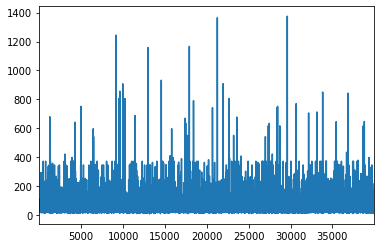

In [139]:
# plot the lenth of all the bad links
bad= analysis_data[analysis_data['label']== 'bad']
bad['length'].plot()

<AxesSubplot:>

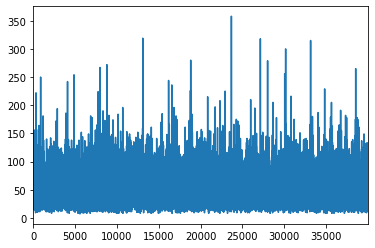

In [140]:
# plot the lenth of all the good links
good= analysis_data[analysis_data['label']== 'good']
good['length'].plot()

In [141]:
# This algorithm finds the number of true phishing, false phishing, true legitimate, false legitimate links 
# estimated by length

# true phishing: label=bad and url_length=1
# false phishing: label=bad and url_length=0
# true legitimate: label=good and url_length=0
# false legitimate: label=good and url_length=1

sum_length_true_bad=sum_length_false_bad=sum_length_false_good=sum_length_true_good=0
for index, row in analysis_data.iterrows():
    if row['label'] == "bad" and row['url_length'] == 1:
        sum_length_true_bad+=1
    if row['label'] == "bad" and row['url_length'] == 0:
        sum_length_false_bad+=1
    if row['label']== "good" and row['url_length'] == 1:
        sum_length_false_good+=1 
    if row['label']== "good" and row['url_length'] == 0:
        sum_length_true_good+=1
print('True bad:', sum_length_true_bad)
print('False bad:', sum_length_false_bad)
print('False good:', sum_length_false_good)
print('True good:', sum_length_true_good)

True bad: 3483
False bad: 6689
False good: 4920
True good: 16866


In [142]:
# Plotting the length dependencies

# creating lists
length_number = [sum_length_true_bad, sum_length_false_bad, sum_length_true_good, sum_length_false_good]
length_class = ['True phishing', 'False phishing', 'True legitimate', 'False legitimate']

#visualizing the chart
chart_length = px.bar(x=length_class, y=length_number, title="URL links estimated by length",
                     labels = {'x':'Rating by length', 'y':'Amount'})
# output the chart
chart_length.show()

Feature 2 "Redirecting"


“//” within the URL path redirect the user to another  website. 
URL redirection attacks are used to take advantage of users’ trust. They are making up 17% of malware infections[1].  
Thus, if there is a redirection in the URL, then the URL is phishing.
In this step we are going to explore how many bad and good URL links includes redirecting.

In [143]:
# This algorithm returns 1 if URL has redirection, and 0 otherwise 
def redirection(l):
    if "//" in str(l):
        return 1
    return 0

In [144]:
# Add a new column to the table
analysis_data['redirection'] = data['URL'].apply(redirection)
analysis_data

,domain,path,label,length,url_length,redirection
0,facebook.com,martin.paul,good,24,0,0
1,mikworks.com,originalwork/footballers/,good,38,0,0
2,upi.com,Top_News/US/2010/12/19/Transbay-Tube-down-to-o...,good,82,1,0
3,evri.com,person/thomas-dagworth-0x9f71d,good,39,0,0
4,eastbay.citysearch.com,profile/1033557/berkeley_ca/skates_on_the_bay....,good,73,1,0
...,...,...,...,...,...,...
39995,infoplease.com,ce6/people/A0828989.html,good,39,0,0
39996,healthgrades.com,dentist/dr-william-dismuke-2jpdg/,good,50,2,0
39997,nfl.com,players/search?filter=linebacker&conferenceAbb...,good,114,1,0
39998,annakraktour.pl,World/gucci2014/gdocs/document.html?ip,bad,54,2,0


In [145]:
# This algorithm finds the number of true phishing, false phishing, true legitimate, false legitimate links 
# estimated by redirection

# true phishing: label=bad and redirection=1
# false phishing: label=bad and redirection=0
# true legitimate: label=good and redirection=0
# false legitimate: label=good and redirection=1
redir_true_bad=redir_false_bad=redir_false_good=redir_true_good=0
for index, row in analysis_data.iterrows():
    if row['label'] == "bad" and row['redirection'] == 1:
        redir_true_bad+=1
    if row['label'] == "bad" and row['redirection'] == 0:
        redir_false_bad+=1
    if row['label'] == "good" and row['redirection'] == 1:
        redir_false_good+=1 
    if row['label'] == "good" and row['redirection'] == 0:
        redir_true_good+=1
print('True bad:', redir_true_bad)
print('False bad:', redir_false_bad)
print('False good:', redir_false_good)
print('True good:', redir_true_good)

True bad: 144
False bad: 11876
False good: 1
True good: 27979


In [146]:
# Plotting the redirecting dependencies

# creating lists
redir_number = [redir_true_bad, redir_false_bad, redir_true_good, redir_false_good]
redir_class = ['True phishing', 'False phishing', 'True legitimate', 'False legitimate']

#visualizing the chart
chart_redir = px.bar(x=redir_class, y=redir_number, title="URL links estimated by redirection",
                     labels = {'x':'Rating by redirection', 'y':'Amount'})
chart_redir.show()

Feature 3 "Special character"


"@" hides the phishing URL. Browser ignores everything preceding the “@” symbol and 
the real address often follows the “@” symbol [2].
In this step we are going to explore how many bad and good URL links includes special characters.

In [147]:
# This function return 1 if URL has @, and 0 otherwise  
def special_character(l):
    if "@" in str(l):
        return 1
    return 0

In [148]:
# Add a new column to the table
analysis_data['character_@'] = data['URL'].apply(special_character)
analysis_data

,domain,path,label,length,url_length,redirection,character_@
0,facebook.com,martin.paul,good,24,0,0,0
1,mikworks.com,originalwork/footballers/,good,38,0,0,0
2,upi.com,Top_News/US/2010/12/19/Transbay-Tube-down-to-o...,good,82,1,0,0
3,evri.com,person/thomas-dagworth-0x9f71d,good,39,0,0,0
4,eastbay.citysearch.com,profile/1033557/berkeley_ca/skates_on_the_bay....,good,73,1,0,0
...,...,...,...,...,...,...,...
39995,infoplease.com,ce6/people/A0828989.html,good,39,0,0,0
39996,healthgrades.com,dentist/dr-william-dismuke-2jpdg/,good,50,2,0,0
39997,nfl.com,players/search?filter=linebacker&conferenceAbb...,good,114,1,0,0
39998,annakraktour.pl,World/gucci2014/gdocs/document.html?ip,bad,54,2,0,0


In [149]:
# This algorithm finds the number of true phishing, false phishing, true legitimate, false legitimate links 
# estimated by special character @

# true phishing: label=bad and character_@=1
# false phishing: label=bad and character_@=0
# true legitimate: label=good and character_@=0
# false legitimate: label=good and character_@=1

special_true_bad=special_false_bad=special_false_good=special_true_good=0
for index, row in analysis_data.iterrows():
    if row['label'] == "bad" and row['character_@'] == 1:
        special_true_bad+=1
    if row['label'] == "bad" and row['character_@'] == 0:
        special_false_bad+=1
    if row['label'] == "good" and row['character_@'] == 1:
        special_false_good+=1 
    if row['label'] == "good" and row['character_@'] == 0:
        special_true_good+=1
print('True bad:', special_true_bad)
print('False bad:', special_false_bad)
print('False good:', special_false_good)
print('True good:', special_true_good)

True bad: 150
False bad: 11870
False good: 15
True good: 27965


In [150]:
# Plotting the special charecters dependencies

# creating lists
special_number = [special_true_bad, special_false_bad, special_true_good, special_false_good]
special_class = ['True phishing', 'False phishing', 'True legitimate', 'False legitimate']

#visualizing the chart
chart_special = px.bar(x=special_class, y=special_number, title="URL links estimated by special character",
                     labels = {'x':'Rating by special character', 'y':'Amount'})
chart_special.show()

Feature 4 "Number of dots in the host name"

A typical host name of the URL consists of subdomain, second-level domain and top-level domain, 
which are separated by dots. It means the standard host name includes 2 dotes. Sometimes host name can include sub domain.
Acording the experiment [3], number of dots in host name in legitimate URL links equals 3.
In this step we are going to explore how many phishing and legitimate URL links have more than 3 dots in the host name.

In [151]:
# This function return 0 if URL has less or equal 3 dots, and 1 otherwise  
def dots_in_host_name(l):
    l= str(l)
    if l.count('.') <= 3:
        return 0
    return 1

In [152]:
# Add a new column to the table
analysis_data['dots_in_host_name'] = analysis_data['domain'].apply(dots_in_host_name)
analysis_data

,domain,path,label,length,url_length,redirection,character_@,dots_in_host_name
0,facebook.com,martin.paul,good,24,0,0,0,0
1,mikworks.com,originalwork/footballers/,good,38,0,0,0,0
2,upi.com,Top_News/US/2010/12/19/Transbay-Tube-down-to-o...,good,82,1,0,0,0
3,evri.com,person/thomas-dagworth-0x9f71d,good,39,0,0,0,0
4,eastbay.citysearch.com,profile/1033557/berkeley_ca/skates_on_the_bay....,good,73,1,0,0,0
...,...,...,...,...,...,...,...,...
39995,infoplease.com,ce6/people/A0828989.html,good,39,0,0,0,0
39996,healthgrades.com,dentist/dr-william-dismuke-2jpdg/,good,50,2,0,0,0
39997,nfl.com,players/search?filter=linebacker&conferenceAbb...,good,114,1,0,0,0
39998,annakraktour.pl,World/gucci2014/gdocs/document.html?ip,bad,54,2,0,0,0


In [153]:
# This algorithm finds the number of true phishing, false phishing, true legitimate, false legitimate links 
# estimated by number of dots in host name

# true phishing: label=bad and dots_in_host_name=1
# false phishing: label=bad and dots_in_host_name=0
# true legitimate: label=good and dots_in_host_name=0
# false legitimate: label=good and dots_in_host_name=1

dots_true_bad=dots_false_bad=dots_false_good=dots_true_good=0
for index, row in analysis_data.iterrows():
    if row['label'] == "bad" and row['dots_in_host_name'] == 1:
        dots_true_bad+=1
    if row['label'] == "bad" and row['dots_in_host_name'] == 0:
        dots_false_bad+=1
    if row['label'] == "good" and row['dots_in_host_name'] == 1:
        dots_false_good+=1 
    if row['label'] == "good" and row['dots_in_host_name'] == 0:
        dots_true_good+=1
print('True bad:', dots_true_bad)
print('False bad:', dots_false_bad)
print('False good:', dots_false_good)
print('True good:', dots_true_good)

True bad: 580
False bad: 11440
False good: 169
True good: 27811


In [154]:
# Plotting the dependencies by number of dots in host name 

# creating lists
dots_number = [dots_true_bad, dots_false_bad, dots_true_good, dots_false_good]
dots_class = ['True phishing', 'False phishing', 'True legitimate', 'False legitimate']

#visualizing the chart
chart_dots = px.bar(x=dots_class, y=dots_number, title="URL links estimated by dots in host name",
                     labels = {'x':'Rating by dots in host name', 'y':'Amount'})
chart_dots.show()

Feature 5 "Number of dots in the path"

According the experiment [3], number of dots in the path in legitimate URL links is found to be less than two.
If number of dots in the path more than two, then the URL is phishing.

In [155]:
# This function return 1 if URL has more than 2 dots in the path, and 0 otherwise  
def dots_in_path(l):
    l= str(l)
    if l.count('.') > 2:
        return 1
    return 0

In [156]:
# Add a new column to the table
analysis_data['dots_in_path'] = analysis_data['path'].apply(dots_in_path)
analysis_data

,domain,path,label,length,url_length,redirection,character_@,dots_in_host_name,dots_in_path
0,facebook.com,martin.paul,good,24,0,0,0,0,0
1,mikworks.com,originalwork/footballers/,good,38,0,0,0,0,0
2,upi.com,Top_News/US/2010/12/19/Transbay-Tube-down-to-o...,good,82,1,0,0,0,0
3,evri.com,person/thomas-dagworth-0x9f71d,good,39,0,0,0,0,0
4,eastbay.citysearch.com,profile/1033557/berkeley_ca/skates_on_the_bay....,good,73,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
39995,infoplease.com,ce6/people/A0828989.html,good,39,0,0,0,0,0
39996,healthgrades.com,dentist/dr-william-dismuke-2jpdg/,good,50,2,0,0,0,0
39997,nfl.com,players/search?filter=linebacker&conferenceAbb...,good,114,1,0,0,0,0
39998,annakraktour.pl,World/gucci2014/gdocs/document.html?ip,bad,54,2,0,0,0,0


In [157]:
# This algorithm finds the number of true phishing, false phishing, true legitimate, false legitimate links 
# estimated by number of dots in path

# true phishing: label=bad and dots_in_path=1
# false phishing: label=bad and dots_in_path=0
# true legitimate: label=good and dots_in_path=0
# false legitimate: label=good and dots_in_path=1

path_true_bad=path_false_bad=path_false_good=path_true_good=0
for index, row in analysis_data.iterrows():
    if row['label'] == "bad" and row['dots_in_path'] == 1:
        path_true_bad+=1
    if row['label'] == "bad" and row['dots_in_path'] == 0:
        path_false_bad+=1
    if row['label'] == "good" and row['dots_in_path'] == 1:
        path_false_good+=1 
    if row['label'] == "good" and row['dots_in_path'] == 0:
        path_true_good+=1
print('True bad:', path_true_bad)
print('False bad:', path_false_bad)
print('False good:', path_false_good)
print('True good:', path_true_good)

True bad: 1140
False bad: 10880
False good: 111
True good: 27869


In [158]:
# Plotting the dependencies by number of dots in the path 

# creating lists
path_number = [path_true_bad, path_false_bad, path_true_good, path_false_good]
path_class = ['True phishing', 'False phishing', 'True legitimate', 'False legitimate']

#visualizing the chart
chart_path = px.bar(x=path_class, y=path_number, title="URL links estimated by dots in the path",
                     labels = {'x':'Rating by dots in the path', 'y':'Amount'})
chart_path.show()

Feature 6 "Number of sensitive domain in the URL"

According to the experiments the URLs, it was found that certain keywords occur frequently in the phished URL. 
For example, the phishing URL includes many keywords such as 'confirm', 'suspend', 'paypal', 'google' etc.

In [159]:
# This function return 1 if URL has at least 1 keyword, and 0 otherwise  
def includes_keyword(l):
    if 'confirm' in str(l) or 'suspend' in str(l) or 'paypal' in str(l) or 'google' in str(l):
        return 1
    return 0

In [160]:
# Add a new column to the table
analysis_data['keyword'] = data['URL'].apply(includes_keyword)
analysis_data

,domain,path,label,length,url_length,redirection,character_@,dots_in_host_name,dots_in_path,keyword
0,facebook.com,martin.paul,good,24,0,0,0,0,0,0
1,mikworks.com,originalwork/footballers/,good,38,0,0,0,0,0,0
2,upi.com,Top_News/US/2010/12/19/Transbay-Tube-down-to-o...,good,82,1,0,0,0,0,0
3,evri.com,person/thomas-dagworth-0x9f71d,good,39,0,0,0,0,0,0
4,eastbay.citysearch.com,profile/1033557/berkeley_ca/skates_on_the_bay....,good,73,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
39995,infoplease.com,ce6/people/A0828989.html,good,39,0,0,0,0,0,0
39996,healthgrades.com,dentist/dr-william-dismuke-2jpdg/,good,50,2,0,0,0,0,0
39997,nfl.com,players/search?filter=linebacker&conferenceAbb...,good,114,1,0,0,0,0,0
39998,annakraktour.pl,World/gucci2014/gdocs/document.html?ip,bad,54,2,0,0,0,0,0


In [161]:
# This algorithm finds the number of true phishing, false phishing, true legitimate, false legitimate links 
# estimated by keywords

# true phishing: label=bad and keyword=1
# false phishing: label=bad and keyword=0
# true legitimate: label=good and keyword=0
# false legitimate: label=good and keyword=1

key_true_bad=key_false_bad=key_false_good=key_true_good=0
for index, row in analysis_data.iterrows():
    if row['label'] == "bad" and row['keyword'] == 1:
        key_true_bad+=1
    if row['label']== "bad" and row['keyword'] == 0:
        key_false_bad+=1
    if row['label'] == "good" and row['keyword'] == 1:
        key_false_good+=1 
    if row['label'] == "good" and row['keyword'] == 0:
        key_true_good+=1
print('True bad:', key_true_bad)
print('False bad:', key_false_bad)
print('False good:', key_false_good)
print('True good:', key_true_good)

True bad: 1043
False bad: 10977
False good: 86
True good: 27894


In [162]:
# Plotting dependencies by the keywords

# creating lists
key_number = [key_true_bad, key_false_bad, key_true_good, key_false_good]
key_class = ['True phishing', 'False phishing', 'True legitimate', 'False legitimate']

#visualizing the chart
chart_key = px.bar(x=key_class, y=key_number, title="URL links estimated by keywords",
                     labels = {'x':'Rating by keywords', 'y':'Amount'})
chart_key.show()

Feature 7 "Hyphen in the host name of the URL"


Acсording to the experiments [3],  more than one hyphen in the domain name of the URL may specify a phishing URL.

In [163]:
# This function return 1 if the URL has more than 1 hyphen in domain name, and 0 otherwise  
def hyphen(l):
    l= str(l)
    if l.count('-') > 1:
        return 1
    return 0

In [164]:
# Add a new column to the table
analysis_data['hyphen'] = analysis_data['domain'].apply(hyphen)
analysis_data

,domain,path,label,length,url_length,redirection,character_@,dots_in_host_name,dots_in_path,keyword,hyphen
0,facebook.com,martin.paul,good,24,0,0,0,0,0,0,0
1,mikworks.com,originalwork/footballers/,good,38,0,0,0,0,0,0,0
2,upi.com,Top_News/US/2010/12/19/Transbay-Tube-down-to-o...,good,82,1,0,0,0,0,0,0
3,evri.com,person/thomas-dagworth-0x9f71d,good,39,0,0,0,0,0,0,0
4,eastbay.citysearch.com,profile/1033557/berkeley_ca/skates_on_the_bay....,good,73,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
39995,infoplease.com,ce6/people/A0828989.html,good,39,0,0,0,0,0,0,0
39996,healthgrades.com,dentist/dr-william-dismuke-2jpdg/,good,50,2,0,0,0,0,0,0
39997,nfl.com,players/search?filter=linebacker&conferenceAbb...,good,114,1,0,0,0,0,0,0
39998,annakraktour.pl,World/gucci2014/gdocs/document.html?ip,bad,54,2,0,0,0,0,0,0


In [179]:
# This algorithm finds the number of true phishing, false phishing, true legitimate, false legitimate links 
# estimated by hyphen

# true phishing: label=bad and hyphen=1
# false phishing: label=bad and hyphen=0
# true legitimate: label=good and hyphen=0
# false legitimate: label=good and hyphen=1

hyphen_true_bad=hyphen_false_bad=hyphen_false_good=hyphen_true_good=0
for index, row in analysis_data.iterrows():
    if row['label'] == "bad" and row['hyphen'] == 1:
        hyphen_true_bad+=1
    if row['label'] == "bad" and row['hyphen'] == 0:
        hyphen_false_bad+=1
    if row['label'] == "good" and row['hyphen'] == 1:
        hyphen_false_good+=1 
    if row['label'] == "good" and row['hyphen'] == 0:
        hyphen_true_good+=1
print('True bad:', hyphen_true_bad)
print('False bad:', hyphen_false_bad)
print('False good:', hyphen_false_good)
print('True good:', hyphen_true_good)

True bad: 468
False bad: 11552
False good: 240
True good: 27740


In [180]:
# Plotting the dependencies by number of hyphens 

# creating lists
hyphen_number = [hyphen_true_bad, hyphen_false_bad, hyphen_true_good, hyphen_false_good]
hyphen_class = ['True phishing', 'False phishing', 'True legitimate', 'False legitimate']

#visualizing the chart
chart_hyphen = px.bar(x=hyphen_class, y=hyphen_number, title="URL links estimated by hyphen",
                     labels = {'x':'Rating by hyphen', 'y':'Amount'})
chart_hyphen.show()

In [181]:
# add table to the file
for column in analysis_data.columns:
    for idx in analysis_data[column].index:
        x = analysis_data.get_value(idx,column)
        try:
            x = x if type(x) == str else str(x).encode('utf-8','ignore').decode('utf-8','ignore')
            analysis_data.set_value(idx,column,x)
        except Exception:
            print('encoding error: {0} {1}'.format(idx,column))
            analysis_data.set_value(idx,column,'')
            continue
analysis_data.to_csv('train.csv')

<ipython-input-181-3a7b3e0cbd66>:4: FutureWarning:

get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

<ipython-input-181-3a7b3e0cbd66>:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



# URLs classification using Random forest method

In [182]:
# import libraries
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [183]:
# features defining
x = analysis_data.columns[4:11]
x 

Index(['url_length', 'redirection', 'character_@', 'dots_in_host_name',
       'dots_in_path', 'keyword', 'hyphen'],
      dtype='object')

In [184]:
#variable for prediction
#good = 0 and bad = 1
y = pd.factorize(analysis_data['label'])[0]
y 

array([0, 0, 0, ..., 0, 1, 1])

In [185]:
# create a random forest classifier
classifier = RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=0)

# traing the classifier
classifier.fit(analysis_data[x], y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [186]:
# import data for prediction
data_for_prediction = pd.read_csv("train.csv") 

In [187]:
# pridiction
classifier.predict(data_for_prediction[x]) 

array([0, 0, 0, ..., 0, 0, 0])

In [188]:
# predicted probability for each class
classifier.predict_proba(data_for_prediction[x])[4:11] 

array([[0.75273221, 0.24726779],
       [0.72183964, 0.27816036],
       [0.72183964, 0.27816036],
       [0.75273221, 0.24726779],
       [0.72183964, 0.27816036],
       [0.75273221, 0.24726779],
       [0.75273221, 0.24726779]])

In [189]:
# predicted values
prediction = data_for_prediction.label[classifier.predict(data_for_prediction[x])] 
prediction

0    good
0    good
0    good
0    good
0    good
     ... 
0    good
0    good
0    good
0    good
0    good
Name: label, Length: 40000, dtype: object

In [190]:
# create a list of predicted data
predict = prediction.to_string(index=False)
predict_list = predict.split() 

In [191]:
# actual values
actual = pd.Series(data_for_prediction['label']) 
actual

0        good
1        good
2        good
3        good
4        good
         ... 
39995    good
39996    good
39997    good
39998     bad
39999     bad
Name: label, Length: 40000, dtype: object

In [194]:
#importance of features
list(zip(analysis_data[x], classifier.feature_importances_))

[('url_length', 0.07121146158900776),
 ('redirection', 0.05278714811610291),
 ('character_@', 0.04396003071817457),
 ('dots_in_host_name', 0.10049319429617876),
 ('dots_in_path', 0.3955564891414791),
 ('keyword', 0.2946270973751971),
 ('hyphen', 0.041364578763859586)]

In [195]:
# plotting the importance of the features
features = ['url length', 'redirection', 'character @', 'dots in host name', 'dots in path', 'keyword', 'hyphen']
val = classifier.feature_importances_

# visualizing the chart
chart_length = px.bar(x=features, y=val, title="Importance of the features of train data",
                     labels = {'x':'Rating', 'y':'Amount'})
chart_length.show()

# Detecting phishing URLs in the test dataset

In [196]:
# import test dataset
data_test = pd.read_csv("test_url_new.csv")

# Split the link into domain and path
analysis_test = data_test['URL'].str.split("/",1,expand = True)

# Rename columns of the splited data 
analysis_test.columns=["domain","path"] 

# Add label column to the table
analysis_test['label'] = pd.Series(data_test['Label'], index=analysis_test.index)

# add column with length of the URL
analysis_test['length']  = data_test['URL'].str.len()
analysis_test

,domain,path,label,length
0,grandmaous.com,docx/index.php,bad,29
1,prettynicewebsite.com,746t3fg3,bad,30
2,'www.leisureideas.com,logic\%20puzzles.htm',good,43
3,mediabistro.com,galleycat/carlo-deste-wins-100000-pritzker-mil...,good,144
4,sunjournal.com,funeral-services/story/1092641,good,45
...,...,...,...,...
9995,runescape-free-rewards.blogspot.com,,bad,36
9996,zimbio.com,photos/Scottie+Upshall/Corey+Crawford,good,48
9997,ishinomakicatering.web.fc2.com,8t76v45,bad,38
9998,worthpoint.com,worthopedia/1950-davis-cup-championship-tennis...,good,71


In [197]:
# Applying function to check URL length
analysis_test['url_length'] = data_test['URL'].apply(url_length) 

# Applying function to check redirection
analysis_test['redirection'] = data_test['URL'].apply(redirection)

# Applying function to check special character
analysis_test['character_@'] = data_test['URL'].apply(special_character)

# Applying function to check number of dots in the host name
analysis_test['dots_in_host_name'] = analysis_test['domain'].apply(dots_in_host_name)

# Applying function to check number of dots in path
analysis_test['dots_in_path'] = analysis_test['path'].apply(dots_in_path)

# Applying function to check keywords
analysis_test['keyword'] = data_test['URL'].apply(includes_keyword)

# Applying function to check hyphen
analysis_test['hyphen'] = analysis_test['domain'].apply(hyphen)

analysis_test

,domain,path,label,length,url_length,redirection,character_@,dots_in_host_name,dots_in_path,keyword,hyphen
0,grandmaous.com,docx/index.php,bad,29,0,0,0,0,0,0,0
1,prettynicewebsite.com,746t3fg3,bad,30,0,0,0,0,0,0,0
2,'www.leisureideas.com,logic\%20puzzles.htm',good,43,0,0,0,0,0,0,0
3,mediabistro.com,galleycat/carlo-deste-wins-100000-pritzker-mil...,good,144,1,0,0,0,0,0,0
4,sunjournal.com,funeral-services/story/1092641,good,45,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,runescape-free-rewards.blogspot.com,,bad,36,0,0,0,0,0,0,1
9996,zimbio.com,photos/Scottie+Upshall/Corey+Crawford,good,48,2,0,0,0,0,0,0
9997,ishinomakicatering.web.fc2.com,8t76v45,bad,38,0,0,0,0,0,0,0
9998,worthpoint.com,worthopedia/1950-davis-cup-championship-tennis...,good,71,1,0,0,0,0,0,0


In [198]:
# add table to the file
for column in analysis_test.columns:
    for idx in analysis_test[column].index:
        x = analysis_test.get_value(idx,column)
        try:
            x = x if type(x) == str else str(x).encode('utf-8','ignore').decode('utf-8','ignore')
            analysis_test.set_value(idx,column,x)
        except Exception:
            print('encoding error: {0} {1}'.format(idx,column))
            analysis_test.set_value(idx,column,'')
            continue
            
analysis_test.to_csv('test.csv')

<ipython-input-198-e222e64522bd>:4: FutureWarning:

get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

<ipython-input-198-e222e64522bd>:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



# test URLs classification using random forest method

In [199]:
# features defining
x = analysis_test.columns[4:11]

#variable for prediction
#good = 0 and bad = 1
y = pd.factorize(analysis_test['label'])[0]

# create a random forest classifier
classifier = RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=0)

# traing the classifier
classifier.fit(analysis_test[x], y)

# import data for prediction
data_for_prediction = pd.read_csv("test.csv") 

# pridiction
classifier.predict(data_for_prediction[x]) 

# predicted probability for each class
classifier.predict_proba(data_for_prediction[x])[4:11] 

# predicted values
prediction_test = data_for_prediction.label[classifier.predict(data_for_prediction[x])] 

# actual values
actual_test = pd.Series(data_for_prediction['label']) 

In [200]:
# create a list from predicted data
pred = prediction_test.to_string(index=False)
prediction_list = pred.split() 

In [208]:
# finding catch rate and false positive rate
true_positive=false_positive=true_negative=false_negative=0
for i in range(10000):
    if prediction_list[i] == "bad" and actual_test[i] == "bad":
        true_positive+=1
    if prediction_list[i] == "good" and actual_test[i] == "bad":
        false_positive+=1
    if prediction_list[i] == actual_test[i] == "good":
        true_negative+=1
    if prediction_list[i] == "bad" and actual_test[i] == "good":
        false_negative+=1
catch_rate = true_positive/(true_positive+false_positive)
false_pos=false_negative/(false_negative+true_negative)                        
print('True positive:', true_positive)
print('False positive:', false_positive)
print('True negative:', true_negative)
print('False negative:', false_negative)
print('Catch rate:',catch_rate)
print('False positive rate:', false_pos)

True positive: 2980
False positive: 0
True negative: 0
False negative: 7020
Catch rate: 1.0
False positive rate: 1.0


In [209]:
# plotting the rating of test data
rate_name = ['Catch Rate', 'False Positive Rate']
rate_value = [catch_rate,false_pos]

# visualizing the chart
chart = px.bar(x=rate_name, y=rate_value, title="Rating of test data",
                     labels = {'x':'Rating', 'y':'Value'})
chart.show()

In [210]:
#importance of features
list(zip(analysis_test[x], classifier.feature_importances_))

[('url_length', 0.06262800420244337),
 ('redirection', 0.044157663168825495),
 ('character_@', 0.05240760849849316),
 ('dots_in_host_name', 0.09271586673646474),
 ('dots_in_path', 0.4334044390362386),
 ('keyword', 0.28134968545371536),
 ('hyphen', 0.03333673290381917)]

In [211]:
# plotting the importance of the features

features = ['url length', 'redirection', 'character @', 'dots in host name', 'dots in path', 'keyword', 'hyphen']
val = classifier.feature_importances_

# visualizing the chart
chart_length = px.bar(x=features, y=val, title="Importance of the features of test data",
                     labels = {'x':'Rating', 'y':'Amount'})
chart_length.show()

# References 
[1]https://www.sitelock.com/blog/prevent-url-redirect-attacks/

[2]https://www.hindawi.com/journals/scn/2019/2595794/tab2/

[3]https://core.ac.uk/download/pdf/193650346.pdf